In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [3]:
# Шаг 1: Подготовка данных
# Замените 'your_data.csv' на путь к вашему файлу данных
data = pd.read_csv('2liver.csv')
data = data.dropna()

In [4]:
# Пример предобработки данных: удаляем нечисловые столбцы
numeric_data = data.select_dtypes(include=[np.number])
X = numeric_data.values

In [5]:
# Шаг 2: Кластеризация методом иерархического агломеративного кластер-анализа
Z = linkage(X, method='ward')  # 'ward' - критерий минимизации дисперсии

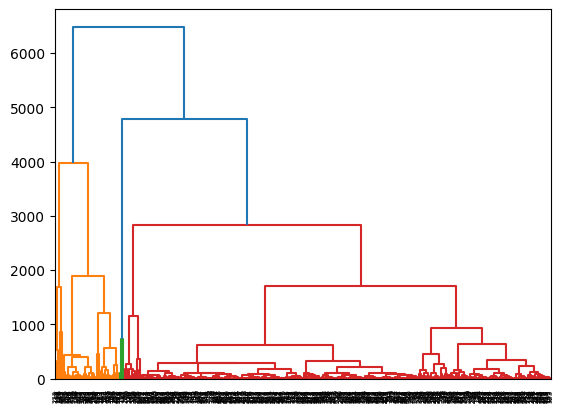

In [7]:
# Шаг 3: Построение дендрограммы
dendrogram(Z)
plt.show()

In [8]:
# Шаг 4: Определение оптимального числа кластеров на основе дендрограммы
# Визуально выберите оптимальное число кластеров
optimal_number_of_clusters_hierarchical = 3  # Пример

In [9]:
# Шаг 6: Присвоение объектам меток кластеров для иерархического метода
hierarchical_cluster_labels = fcluster(Z, t=optimal_number_of_clusters_hierarchical, criterion='maxclust')

In [10]:
# Шаг 7: Кластеризация методом k-средних
optimal_number_of_clusters_kmeans = 3  # Пример
kmeans = KMeans(n_clusters=optimal_number_of_clusters_kmeans)
kmeans.fit(X)
kmeans_cluster_labels = kmeans.labels_

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Шаг 8: Расчет центроидов для кластеров в методе k-средних
centroids_kmeans = kmeans.cluster_centers_

In [12]:
# Шаг 9: Расчет евклидова расстояния между кластерами
distances = pairwise_distances(centroids_kmeans, metric='euclidean')

In [13]:
# Шаг 10: Присвоение объектам меток кластеров для k-средних метода
kmeans_cluster_labels = kmeans.labels_

In [14]:
# Вывод меток кластеров для k-средних метода
print("Метки кластеров (k-средних метод):", kmeans_cluster_labels)
# Вывод расстояний между кластерами
print("Евклидово расстояние между кластерами:")
print(distances)


Метки кластеров (k-средних метод): [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 